# generated the data from solver for taining the data driven

In [ ]:

import jax
import numpy as np
import jax.random as random
import jax.numpy as jnp
import jax.numpy.fft as jfft
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from numpy import sqrt
from numpy import round
from matplotlib import pyplot as plt
from matplotlib import contour
from jax.numpy.fft import fft2, ifft2
from jax.numpy.fft import fftn, ifftn
from numpy import real
from jax.example_libraries.stax import serial, Gelu
from jax.example_libraries.optimizers import optimizer, make_schedule
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

import os 
# @partial(jit, static_argnums=(0,))
def allen_cahn_equation(uk, pp2, qq2, dt, eps, Nt):

    cahn = eps**2
    samples_timesteps = []

    for iter in range(0, Nt+1):
        uk = jnp.real(uk)

        # Compute denominator in Fourier space
        denominator = cahn + dt * (2 + cahn * (pp2 + qq2))

        # Perform FFT calculations
        s_hat = jfft.fft2(cahn * uk - dt * (uk**3 - 3 * uk)) 

        v_hat = s_hat / denominator  # Now shapes should match


        uk = jfft.ifft2(v_hat)  # inverse FFT
        uk = jnp.real(uk)
        if iter%4000 == 0:
            samples_timesteps.append(uk)

        # Return the real part
    return jnp.array(samples_timesteps)  # Return only the real part





# difinning the no of grid points in x, y and z
Nx = 28 # number of grid points in x be positive even integer number
Ny = 28 # number of grid points in y be positive even integer number



# Define the parameters of the Allen-Cahn equation in 2d
Lx = 2.0 * jnp.pi #length of the domain in x
Ly = 2.0 * jnp.pi #length of the domain in y
hx = Lx / Nx #spatial step size in coordinate x
hy = Ly / Ny #spatial step size in coordinate y
dt = 0.0001 #time step size
T = 4 #final time
Nt = int(jnp.round(T/dt)) #number of time steps
ns = Nt / 10 #number of snapshots

# Define the grid points in x and y direction
def x_gridpoint(Nx, Lx, hx):
    x = jnp.linspace(-0.5*Lx+hx,0.5*Lx,Nx)
    return x
x = x_gridpoint(Nx, Lx, hx) #number of grid points in x direction and step size and limitation on x  axis
def y_gridpoint(Ny, Ly, hy):
    y = jnp.linspace(-0.5*Ly+hy,0.5*Ly,Ny)
    return y
y = y_gridpoint(Ny, Ly, hy) #number of grid points in y direction and step size and limitation on y  axis 

# creating meshgrid in x and y direction
xx,yy = jnp.meshgrid(x,y) #creating meshgrid in x and y direction 

epsillon = 0.5 #small parameter # interface thickness in the Allen-Cahn equation 
cahn = epsillon**2 #cahn number  

# theta = jnp.arctan2(yy, xx)
#   # or another appropriate value
# uk = jnp.tanh((1.7 + 1.2 * np.cos(6 * theta)) - jnp.sqrt(xx**2 + yy**2) / (jnp.sqrt(2) * epsillon))
data = np.load('data_generation_checking/phasefield2d_data_28x28_10k.npy')

# Select 1,000 random samples
key = jax.random.PRNGKey(0)  # Random seed for reproducibility
idx = jax.random.choice(key, data.shape[0], shape=(1000,), replace=False)  # Random 1k indices
input_samples = data[idx]  # Shape: (1000, Nx, Ny)
# print(f'uk ko shape:{uk.shape}')


# defining the wavenumber in x and y direction , which is in fourier space
p = jnp.concatenate([2 * jnp.pi / Lx * jnp.arange(0, Nx//2), 2 * jnp.pi / Lx * jnp.arange(-Nx//2  , 0)]) # wavenumber in x direction
q = jnp.concatenate([2 * jnp.pi / Ly * jnp.arange(0, Ny//2), 2 * jnp.pi / Ly * jnp.arange(-Ny//2 , 0)])


# square of wavenumber in x and y direction
p2 = p**2 # square of wavenumber in x direction
q2 = q**2 # square of wavenumber in y direction

# creating meshgrid in x and y direction for square of wavenumber
pp2, qq2 = jnp.meshgrid(p2, q2)


input_samples= input_samples.reshape(-1, Nx , Ny)

samples = []

for uk in input_samples:
   
    ac_input = allen_cahn_equation(uk, pp2, qq2, dt, epsillon, Nt)
# print(f'shape of ac_input:{ac_input.shape}')
    samples.append(ac_input)
samples = jnp.array(samples)
print(f'samples ko shape:{samples.shape}')
      

# Specify the directory where y want to save the data
save_dir = './data_driven/'

    # Ensure the directory exists, create it if not
os.makedirs(save_dir, exist_ok=True)



In [12]:
# Save the training and testing data
# print("Saving training data to u_train.npy...")
np.save(os.path.join(save_dir, "driven_data_28x28_1k_input_samples.npy"), np.array(input_samples))

In [15]:
loaded_input_samples = np.load(os.path.join(save_dir, "driven_data_28x28_1k_input_samples.npy"))
print(f'loaded_input_samples ko shape:{loaded_input_samples.shape}')

loaded_samples = np.load(os.path.join(save_dir, "driven_data_28x28_1k_11timestep.npy"))
print(f'loaded_samples ko shape:{loaded_samples.shape}')

loaded_input_samples ko shape:(1000, 28, 28)
loaded_samples ko shape:(1000, 11, 28, 28)


# plot the data 

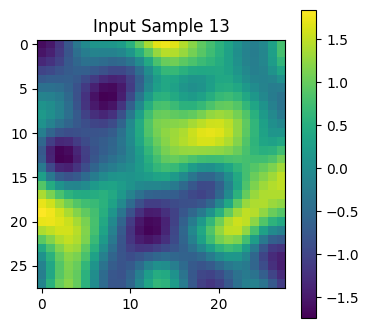

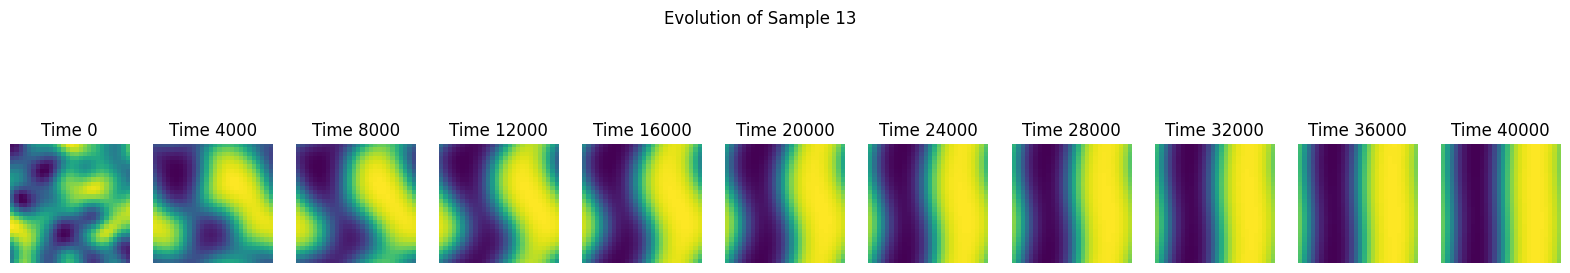

c:\Users\Manju\Documents\python\envs\myenv\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


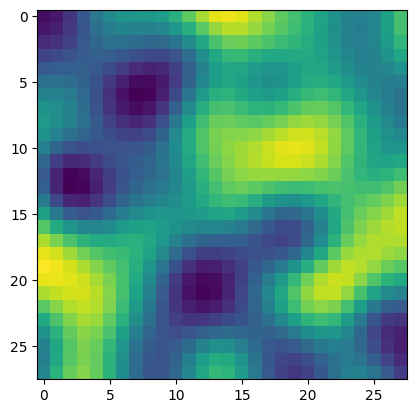

In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Choose a sample index
sample_idx = 13

# Define the directory
plot_save_dir = os.path.join(save_dir,  "data_driven_plot")

# Create the directory if it doesn't exist
os.makedirs(plot_save_dir, exist_ok=True)


# Plot input data
plt.figure(figsize=(4, 4))
plt.imshow(loaded_input_samples[sample_idx], cmap='viridis')
plt.colorbar()
plt.title(f'Input Sample {sample_idx}')
plt.savefig(os.path.join(plot_save_dir, f'input_sample_{sample_idx}.png')) 
plt.show()


# Choose a sample index
sample_idx = 13

fig, axes = plt.subplots(1, 11, figsize=(20, 4))  # 11 time steps

for t in range(11):
    axes[t].imshow(loaded_samples[sample_idx, t], cmap='viridis')
    axes[t].set_title(f'Time {t * 4000}')
    axes[t].axis('off')

plt.suptitle(f'Evolution of Sample {sample_idx}')
plt.savefig(os.path.join(plot_save_dir, f'Evolution_sample_{sample_idx}.png'))
plt.show()



import matplotlib.animation as animation

fig, ax = plt.subplots()
im = ax.imshow(loaded_samples[sample_idx, 0], cmap='viridis')

def update(frame):
    im.set_array(loaded_samples[sample_idx, frame])
    ax.set_title(f'Time Step: {frame * 4000}')
    return im,

ani = animation.FuncAnimation(fig, update, frames=11, interval=500)

# ani.save(evolution_animation.gif', writer='pillow')  # Save as GIF
plt.show()


## copy required code from model training, here we are calculating the data driven loss

In [52]:
import jax
import jax.numpy as jnp
from jax import grad, jit, random
from jax.example_libraries.stax import Dense, Gelu, serial
from jax.example_libraries.optimizers import optimizer, make_schedule
# from jax.scipy.fftpack import fftn, ifftn
import numpy as np
import matplotlib.pyplot as plt
from torch import no_grad
from tqdm import trange
from functools import partial
from jax.numpy.fft import fftn, ifftn, fftshift, ifftshift
from jax.example_libraries.optimizers import exponential_decay
import jax.numpy.fft as jfft
from jax.example_libraries.stax import Dense, Gelu, serial, glorot_normal
from spifol_archs import FNOBlock2D, Permute, complex_adam, MLP, modified_MLP
from jax import vmap
from torch.utils import data
from jax import lax
from jax import debug
from jax.flatten_util import ravel_pytree
import itertools
from matplotlib.cm import tab20
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split






def fft2(x):
   """Applies a 2D FFT over the first two dimensions of the input array x."""
   return fftn(x, axes=(0, 1))


def ifft2(x):
   """Applies a 2D inverse FFT over the first two dimensions of the input array x."""
   return ifftn(x, axes=(0, 1))



# @jax.jit
def normalize(data):
    min_val = jnp.min(data, axis=(0, 1))
    max_val = jnp.max(data, axis=(0, 1))
    range_val = max_val - min_val
    range_val = jnp.where(range_val == 0, 1, range_val)  # Avoid division by zero
    normalized_data = 2 * (data - min_val) / range_val - 1
    return normalized_data, min_val, range_val 



def denormalize(normalized_data, min_val, range_val):
    range_val = jnp.where(range_val == 0, 1, range_val)  # Ensure no division by zero
    data = ((normalized_data + 1) * range_val) / 2 + min_val
    return data



# Data genrator to make randomized batches
class DataGenerator(data.Dataset):
    def __init__(self, u,
                 batch_size=64, rng_key=random.PRNGKey(1234)):
        'Initialization'
        self.u = u # input sample

        self.N = u.shape[0]
        self.batch_size = batch_size
        self.key = rng_key

    def __getitem__(self, index):
        'Generate one batch of data'
        self.key, subkey = random.split(self.key)
        u = self.__data_generation(subkey)
        return u

    #@partial(jit, static_argnums=(0,))
    def __data_generation(self, key):
        'Generates data containing batch_size samples'
        idx = random.choice(key, self.N, (self.batch_size,), replace=False)
        u = self.u[idx,:]
        # Construct batch
        return u





class SPiFOL:
    def __init__(self, L, x, y, h, eps, pp2, qq2, dt,  N, fno_layers, mlp_layers,lr, arch):
        self.arch = arch
        self.N = N
        self.lr = lr
        # self.norm_par = norm_par
        self.eps = eps
        self.pp2 = pp2
        self.qq2 = qq2
        self.dt = dt
        self.L = L
        self.h = h
        self.x = x
        self.y = y
        
        # Initialize the network based on architecture type
        if arch == 'FNO':
            self.N_init, self.N_apply = serial(*fno_layers)
            _, params = self.N_init(random.PRNGKey(1234), (-1, N, N, 1))
            
        elif arch == 'MLP':
            self.N_init, self.N_apply = MLP(mlp_layers)
            params = self.N_init(random.PRNGKey(1234))
            
        elif arch == 'modified_MLP':
            self.N_init, self.N_apply = modified_MLP(mlp_layers)
            params = self.N_init(random.PRNGKey(1234))
        else:
            raise ValueError("Unsupported architecture!")


        self.params = params



        # Optimizer setup
        self.opt_init, self.opt_update, self.get_params = complex_adam(
            jax.example_libraries.optimizers.exponential_decay(
                lr, decay_steps=2000, decay_rate=0.9)
            )

        self.opt_state = self.opt_init(self.params)
        


        # Logging losses
        self.train_losses = []
        self.test_losses = []  # Initialize list to track test losses


          # Initialize optimizer state
        self.opt_state = self.opt_init(self.params)
        _, self.unravel = ravel_pytree(params)  # Assuming all networks have the same structure
        self.itercount = itertools.count()

       
  

    

    
    # @partial(jit, static_argnums=(0,))
    def operator_net(self, params, uk):
        if self.arch == 'FNO':
            
            input_FNO = uk.reshape(-1, self.N, self.N, 1)  # Reshape for FNO
    
            O = self.N_apply(params, input_FNO)  # Apply the FNO network 
            O = O.reshape(self.N, self.N, 1)  # Reshape output
            return O
        elif self.arch == 'MLP':
            uk = uk.flatten()
            O = self.N_apply(params, uk)  # Directly apply the network
            O = O.reshape(uk.shape[0], self.N, self.N, uk.shape[3])  # Reshape output to match strain components
            return O
        elif self.arch == 'modified_MLP':
            uk = uk.flatten()
            O = self.N_apply(params, uk)
            O = O.reshape(uk.shape[0], self.N, self.N, uk.shape[3])
            return O
        else:
            raise ValueError("Unsupported architecture type!")
      

    @partial(jit, static_argnums=(0,))
    def allen_cahn_equation(self, uk):
        
        cahn = eps**2
        uk = jnp.real(uk)

        # Compute denominator in Fourier space
        denominator = cahn + self.dt * (2 + cahn * (self.pp2 + self.qq2))
        # print("Denominator shape:", denominator.shape)

        # Expand the denominator to match the shape of s_hat (28, 28, 1)
        denominator = denominator[..., None]  # Add a third dimension to make the shape (28, 28, 1)
        # print("Denominator shape after expansion:", denominator.shape)

        # Perform FFT calculations
        s_hat = jfft.fft2(cahn * uk - self.dt * (uk**3 - 3 * uk)) 
        # print("Shape of s_hat (after fft2):", s_hat.shape)

        v_hat = s_hat / denominator  # Now shapes should match
        # print("Shape of v_hat (after division):", v_hat.shape)

        uk = jfft.ifft2(v_hat)  # inverse FFT
        # print("Shape of uk (after ifft2):", uk.shape)

        uk = uk.reshape(self.N, self.N, 1)  # Reshaping to (N, N, 1)
        # print("Shape of uk after reshaping:", uk.shape)

        # Return the real part
        return jnp.real(uk)  # Return only the real part



    @partial(jit, static_argnums=(0,))
    def loss_single(self, params, batch_input, batch_label):
        # uk is the input data and u_nn is the next uK+1 data of neural network and u_ac is also next u_ac_k+1 data
        
        u_nn = self.operator_net(params, batch_input) # predicted or next value of the initial condition
        u_nn = u_nn.reshape(self.N, self.N, 1)     
       
        datadriven_loss = jnp.mean((batch_label - u_nn) ** 2)
        return datadriven_loss

    @partial(jit, static_argnums=(0,))
    def loss_batches(self, params, batch_input, batch_label):
        print(f'vmap agadi :{batch_input.shape, batch_label.shape}')
       
        batch_loss = vmap(self.loss_single, (None, 0))(params, batch_input, batch_label)
        batch_loss  = jnp.mean(batch_loss)
        return batch_loss


    @partial(jit, static_argnums=(0,))
    def step(self, i, opt_state, batch_input, batch_label):
        params = self.get_params(opt_state)
        grads = grad(self.loss_batches)(params, batch_input, batch_label)
        return self.opt_update(i, grads, opt_state)


   # Update the train method of tum_epochshe SPiFOL class
    def train(self, train_input_batch, train_label_batch,  test_input_batch, test_label_batch, nIter=10000):
        data_input = iter(train_input_batch)
        data_label = iter(train_label_batch)
        pbar = trange(nIter)  # Progress bar for total iterations



        for it in pbar:
            batch_input = next(data_input)
            batch_label = next(data_label)
            batch_input = jnp.array(batch_input)
            batch_label = jnp.array(batch_label)
            print(f'step agadi :{batch_input.shape, batch_label.shape}')
            self.opt_state = self.step(next(self.itercount), self.opt_state, batch_input, batch_label)

            if it % 1 == 0:
                params = self.get_params(self.opt_state)
                loss = self.loss_batches(params, test_input_batch, test_label_batch)
                loss_test = self.loss_batches(params, test_input_batch, test_label_batch)
                self.train_losses.append(loss)
                self.test_losses.append(loss_test)
                pbar.set_postfix({'train Loss': loss, 'test loss': loss_test})


    def pred(self, data_test):
        uk_solver_list = []
        uk_nnetwork_list = []
        

        for item in data_test:

            uk = self.allen_cahn_equation(item)
            # cahn = eps**2
            # uk = jnp.real(item)
           

            # # Compute denominator in Fourier space
            # denominator = cahn + dt * (2 + cahn * (pp2 + qq2)) 
            
            # # Perform FFT calculations
            # s_hat = jfft.fft2(cahn * uk - dt * (uk**3 - 3 * uk))  
            # v_hat = s_hat / denominator  
            # uk_ac = jfft.ifft2(v_hat)  
            uk_ac = uk.reshape(self.N, self.N, 1)
            uk_solver_list.append(uk_ac)

            params = self.get_params(self.opt_state)
    
            uk_nnetwork = self.operator_net(params, item)
            uk_nnetwork_list.append(uk_nnetwork)
        uk_solver = jnp.array(uk_solver_list)
        uk_nnetwork = jnp.array(uk_nnetwork_list)

        #  flatten 
        u_pred = jnp.reshape(uk_nnetwork, (uk_nnetwork.shape[0], -1 ))  
        u_true = jnp.reshape(uk_solver, (uk_solver.shape[0], -1))  
        
        # Compute R² Score
        r2 = r2_score(jnp.array(u_true), jnp.array(u_pred))  

        # Compute Mean Squared Error (MSE)
        mse = mean_squared_error(jnp.array(u_true), jnp.array(u_pred))  

        # Compute L₂ Relative Error (normalized error)
        l2_rel = jnp.linalg.norm(u_true - u_pred) / jnp.linalg.norm(u_true)  # L2 error

        
        
        return r2, mse, l2_rel, uk_solver, uk_nnetwork


    def plot_losses(self, save_as):
            # Convert loss array and jax numpy array for plotting
            total_train_loss = jnp.asarray(self.train_losses)
            total_test_loss = jnp.asarray(self.test_losses)
            
            
            #print(total_loss)
            color = tab20.colors
            x_axis = jnp.arange(1, total_train_loss.size + 1, 1) # x_axis: Epoch numbers from 1 to 100

            #print(x_axis)
            # Create plot
            plt.figure(constrained_layout=True)
            ax = plt.subplot(111)

            plt.semilogy(x_axis, total_train_loss, label="Train", c=color[0])
            plt.semilogy(x_axis, total_test_loss, label="Test", c=color[6])
            #plt.semilogy(x_axis, mm_loss, label="Material Model", c=color[1])
            #plt.semilogy(x_axis, div_loss, label="Div Loss", c=color[2])
            plt.ylabel("Loss")
            plt.xlabel("Iterations")
            plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1))
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
            plt.savefig(save_as + "Total_loss.png")

                


# Parameters
N = 28 # no. of grid points
eps = 0.05 # epsillon 
lr = 0.001 # learning rate
dt = 0.0001 # time step or time increment
L = 2 * jnp.pi # length of domian
h = L/N # spacing between grid or length of grid
x = jnp.linspace(-0.5 * L + h, 0.5 * L, N)
y = jnp.linspace(-0.5 * L + h, 0.5 * L, N)
xx, yy = jnp.meshgrid(x, y)


 # number of epochs for training


 # defining the wavenumber in x and y direction , which is in fourier space
p = jnp.concatenate([2 * jnp.pi / L * jnp.arange(0, N//2), 2 * jnp.pi / L * jnp.arange(-N//2  , 0)]) # wavenumber in x direction
q = jnp.concatenate([2 * jnp.pi / L * jnp.arange(0, N//2), 2 * jnp.pi / L * jnp.arange(-N//2 , 0)])
p2 = p**2 # square of wavenumber in x direction
q2 = q**2 # square of wavenumber in y direction
pp2, qq2 = jnp.meshgrid(p2, q2)
# print(f'pp2 shape:{pp2.shape}')
# print(f'qq2 shape:{qq2.shape}')




mlp_layers = [16384, 32, 32, 16384]


# Define FNO layers
fno_layers = [
   Dense(64),
   Permute("ijkl->iljk"),
   FNOBlock2D(15),
   Gelu,  # activation can be changed here
   FNOBlock2D(15),
   Gelu,
   FNOBlock2D(15),
   Permute("ijkl->iklj"),
   Dense(128),
   Gelu,
   Dense(10),
]

cahn = eps**2
epochs = 2

data = np.load('data_driven/driven_data_28x28_1k_11timestep.npy') 
data_input = data[:, :-1, :, :]
data_label = data[:, 1:, :, :]
print(f'dataset ko shape:{data_input.shape, data_label.shape}')

# data_plot_input = data_input[610][0]
# data_plot_label = data_label[610][9]
# fig, axes = plt.subplots(1, 2, figsize=(20, 4))  # 11 time steps
# print(axes)
# axes[0].imshow(data_plot_input)
# axes[1].imshow(data_plot_label)
# plt.show()


# Generate the data trainig samples
data_input_reshape = data_input.reshape(-1, N, N, 1)
data_label_reshape = data_label.reshape(-1, N, N, 1) # label is the gt here 
print(f'dataset ko shape after reshape:{data_input_reshape.shape, data_label_reshape.shape}')

# sample_idx = 610
# original_sample = sample_idx//10
# time_step = sample_idx % 10

# assert np.array_equal(data_input_reshape[sample_idx], data_input[original_sample, time_step , :, :]), "Mismatch in data_train"
# assert np.array_equal(data_label_reshape[sample_idx], data_label[original_sample, time_step , :, :]), "Mismatch in data_gt"
# print("Correspondence verified successfully!")
# data_plot_input = data_input[original_sample, time_step , :, :]
# data_plot_input1 = data_input_reshape[sample_idx]
# data_plot_label = data_label[original_sample, time_step , :, :]
# data_plot_label1 = data_label_reshape[sample_idx]

# fig, axes = plt.subplots(1, 4, figsize=(8, 4))  # 11 time steps
# print(axes)
# axes[0].imshow(data_plot_input)
# axes[1].imshow(data_plot_input1)
# axes[2].imshow(data_plot_label)
# axes[3].imshow(data_plot_label1)
# plt.show()

# Split the dataset
train_input, test_input, train_label, test_label = train_test_split(
    data_input_reshape, data_label_reshape, test_size=0.1, random_state=42
)

# Print shapes to verify
print(f"Train Input Shape: {train_input.shape}")
print(f"Test Input Shape: {test_input.shape}")
print(f"Train Prediction Shape: {train_label.shape}")
print(f"Test Prediction Shape: {test_label.shape}")

train_input_batch = DataGenerator(train_input, batch_size=20)
test_input_batch = DataGenerator(test_input, batch_size=20)
train_label_batch = DataGenerator(train_label, batch_size=20)
test_label_batch = DataGenerator(test_label, batch_size=20)

# Print shapes to verify
print(f"Train Input Shape: {train_input_batch[0].shape}")
print(f"Test Input Shape: {test_input_batch[0].shape}")
print(f"Train Prediction Shape: {train_label_batch[0].shape}")
print(f"Test Prediction Shape: {test_label_batch[0].shape}")




# print(f'dataset ko shape:{dataset[0].shape, data_test[0].shape}')



#    # Initialize and train the model
NN_model = SPiFOL(L, x, y, h, eps, pp2, qq2, dt, N, fno_layers, mlp_layers, lr, arch= 'FNO')
NN_model.train(train_input_batch, train_label_batch,  test_input_batch, test_label_batch, nIter = epochs)
# r2, mse, l2_rel, u_solver, u_pred = NN_model.pred(data_test)
# print(f'r2:{r2},mse : {mse}, l2_rel : {l2_rel}')

# NN_model.plot_losses(f'plots/training_log_iter_{epochs}.png')


# import pickle
# # saving the parameter
# def save_model(model, filename):
#     # Save model parameters, architecture and optimizer state
#     save_dict = {
#         'arch': model.arch,
#         'N': model.N,
#         'lr': model.lr,
#         'eps': model.eps,
#         'pp2': model.pp2,
#         'qq2': model.qq2,
#         'dt': model.dt,
#         'L': model.L,
#         'h': model.h,
#         'x': model.x,
#         'y': model.y,
#         'params': jax.device_get(model.get_params(model.opt_state)),
#         'train_losses': model.train_losses,
#         'test_losses': model.test_losses,
#         'opt_state': jax.device_get(model.opt_state),  # Save optimizer state too
#     }

#     with open(filename, 'wb') as f:
#         pickle.dump(save_dict, f)


# save_model(NN_model, f'models/savemodel_{epochs}.pkl')

dataset ko shape:((1000, 10, 28, 28), (1000, 10, 28, 28))
dataset ko shape after reshape:((10000, 28, 28, 1), (10000, 28, 28, 1))
Train Input Shape: (9000, 28, 28, 1)
Test Input Shape: (1000, 28, 28, 1)
Train Prediction Shape: (9000, 28, 28, 1)
Test Prediction Shape: (1000, 28, 28, 1)
Train Input Shape: (20, 28, 28, 1)
Test Input Shape: (20, 28, 28, 1)
Train Prediction Shape: (20, 28, 28, 1)
Test Prediction Shape: (20, 28, 28, 1)


  0%|          | 0/2 [00:00<?, ?it/s]

step agadi :((20, 28, 28, 1), (20, 28, 28, 1))
vmap agadi :((20, 28, 28, 1), (20, 28, 28, 1))


ValueError: vmap in_axes must be an int, None, or a tuple of entries corresponding to the positional arguments passed to the function, but got len(in_axes)=2, len(args)=3